# Creating Fake Galaxies with BAGPIPES

**Fun fact: Astronomers love silly acronyms.**

[BAGPIPES](https://bagpipes.readthedocs.io/en/latest/) (Bayesian Analysis of Galaxies for Physical Inference and Parameter EStimation) is a code that models the light coming from galaxies allowing us measure their properties.

But hey, **don't be scared of the complicated words**, here we will just use this code to have some fun creating fake galaxies!

Also here's some dude playing the Bagpipes:

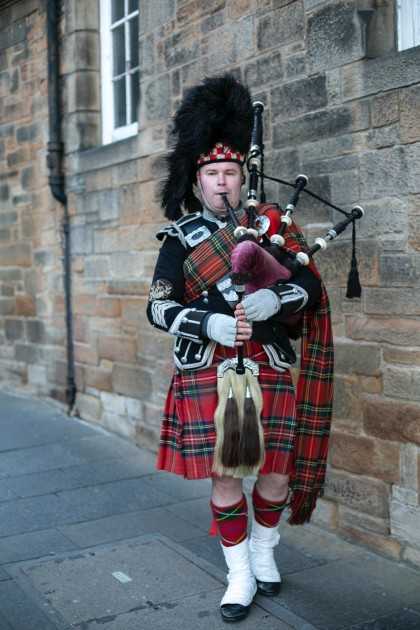

I found this picture by [Evie Fjord](https://unsplash.com/@eviefjord) on [Unsplashed](https://unsplash.com) and it is not stealing if you give credit to the author.

# 1. Setting up Google Colab

#### 1.1  Installing BAGPIPES

BAGPIPES (as a lot of other software) is not included by default in Colab, but we can easily install it. For that, just **run the cell below** and wait a little bit. It will install and import BAGPIPES.

It will give out a couple of error messages because this command doesn't provide a complete installation, but don't worry about that, all of the features needed for this experiment should be installed just with that.

**If you're extra curious:** pip is a command that can install any python package that is indexed in the [Python Package Index](https://pypi.org). It is a shell command, not a python command, which is why we have to include the exclamation point to run it in Colab.

In [ ]:
!pip install bagpipes
import bagpipes as pipes

#### 1.2 Connecting to Google Drive and Setting Paths

We will need to access some files for our experiment, for that, we first have to connect Colab to your Google Drive. This can be done by running the cell below and following the login procedure.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

You should have access directory named PCTO_BAGPIPES in our shared drive, there you will find files with the HST filters and some data.

Copy it to your Google Drive and change the `pcto_dir` variable accordingly if necessary.

In [ ]:
pcto_dir = '/content/drive/MyDrive/PCTO_BAGPIPES/'
data_dir = pcto_dir + 'Data/'

We can check the files in each of the directories with the `os` module.

In [ ]:
import os
os.listdir(pcto_dir)

#### 1.3 Loading Functions from an External File

We will need to import some [python functions](https://www.geeksforgeeks.org/python-functions/) from an external file called black_box.py which includes all the complicated code that we don't want you to see. The file should be in `pcto_dir` and you can import the functions by running the cell below.


In [ ]:
import sys
sys.path.append(pcto_dir)

from black_box import plot_filters, plot_sfh, plot_model, plot_model_unphysical

In [ ]:
plot_filters??

#### 1.4 Reading Filter Files

Later on (mainly on the next lesson) we will be modeling observations made with the Hubble Space Telescope (HST) in 5 filters. These filters work by allowing light from a certain wavelength range to fall into the detector while blocking any other light.

We will need to use the **transmission curves** of these 5 filters, which describe how much light is allowed to pass as a function of wavelength.

Below we will create a [list](https://developers.google.com/edu/python/lists) with the path to the filter curves, which will be useful later.

In [ ]:
filter_dir = data_dir + 'Filters/'

hst_filters = ['F275W', 'F336W', 'F606W', 'F680N', 'F814W']

filter_files = [filter_dir + 'HST_WFC3_UVIS2.F275W.dat',
                filter_dir + 'HST_WFC3_UVIS2.F336W.dat',
                filter_dir + 'HST_WFC3_UVIS2.F606W.dat',
                filter_dir + 'HST_WFC3_UVIS2.F680N.dat',
                filter_dir + 'HST_WFC3_UVIS2.F814W.dat']

In the `black_box` module that we imported earlier on you'll find the `plot_filters` function that you can use to plot the transmission curves like in the cell below.

In [ ]:
plot_filters(filter_files, hst_filters)

# 2. How to make a galaxy?

The main ingredients to make a galaxy are stars, gas and dust.

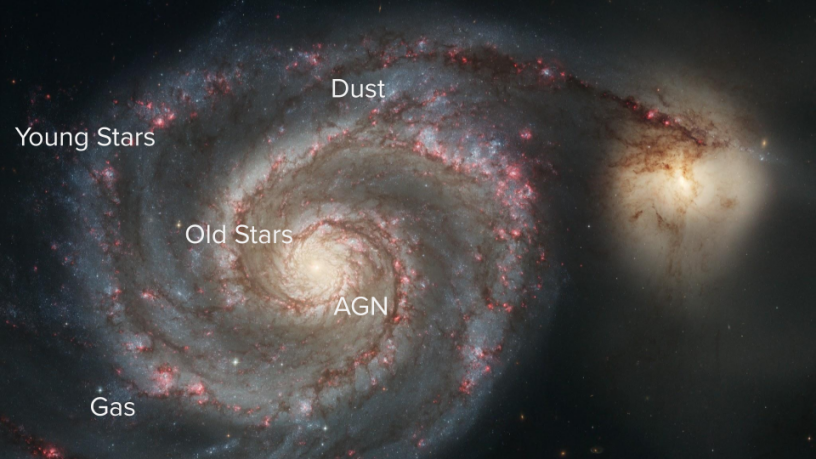

Each one of these components will leave distict signatures in the light coming from galaxies.

* **Stars** emmit light in many wavelegths, they can be more blue or more red depending on their temperature.

* **Dust** is the Robin Hood of galaxies, absorbing light at short wavelengths (high energy, blue colors) and re-emmiting at longer wavelenths (low energy, infrared).

* **Gas** comes at many forms. In the wavelenghts that we are studying it will show up in the form of emission lines, which are little spikes of emission in specific wavelengths corresponding to the binding energy of the chemical elements present in the gas. These lines are observed only when the gas is ionized, usually by young stars or Active Galactic Nuclei (AGN).


Below we are plotting the full spectrum of light coming from a galaxy, we appologize for using such weird units, it is done this way so we can show all features in a proper scale.

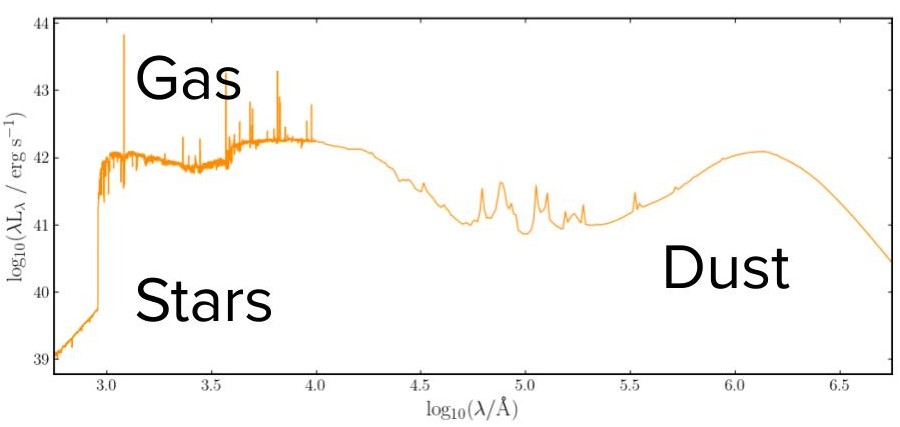

#### 2.1 Star-formation histories

The stellar light of a galaxy depends on it's entire history of star-formation, a galaxy with only old stars will have a red spectrum (more emission in longer wavelengths), and more young stars will make this spectrum increasingly blue (more emission in shorter wavelengths).

The star-formation history is a function of time against the star-formation rate (how much stellar mass is being formed in a certain time).

Here we will be modeling this history of star-formation as an exponential function, assuming that the galaxy starts forming stars in a given moment and the amount of star-formation declines exponentally after that. There are 3 parameters to be set:


*   **age:** The age (in billions of years) of the oldest stars in the galaxy, or how long ago it started forming stars.
*   **tau ($\tau$):** A scale of time (in billions of years) controling how quickly the star-formation drops.
*   **mass**: How much stellar mass (in powers of 10 of solar masses) was formed during the history of star-formation, the area below the curve of the star-formation history.


The function `plot_sfh()` included in the `black_box` module will plot the star-formation history given a choice of parameters, go ahead and try using the cell below.

**Golden tip:** If you type the name of a python function with a question mark in the end (e.g `plot_sfh?`), you'll be able to see which parameters go into that function. Two question marks will display the code of that function.

**Remember that** The universe is about 13.5 billion years old.

In [ ]:
plot_sfh(age=12.6, tau=0.1, mass=10)

#### 2.2 Making Models for Different Star-Formation Histories

With the function `plot_model` you can see how the spectrum of a galaxy changes according to different star-formation histories.

We will now concentrate on the wavelenth range between 2000 and 9000 Angstroms, which is more or less the range covered by our HST filters.

**Note that** models with more young stars will have more emission lines (those little peaks in the spectrum).

Go ahead and fiddle with the values in the cell below.

In [ ]:
plot_model(age=0.5, tau=1.1, mass=10)

**Note:** The scale of the x and y axis are set automatically, but you may want to fiddle with it to highlight what you want, for this you should use the matplotlib commands `plt.xlim(min, max)` and `plt.ylim(min, max)`.

For instance, in the cell below we set the x limits from 4000 to 5000 Angstrom and y limits from 0 to $10^{41}$.

We have to import matplotlib first with `import matplotlib.pyplot as plt`, which you only have to do once.

In [ ]:
import matplotlib.pyplot as plt

plot_model(age=1.1, tau=1.1, mass=10)
plt.xlim(4000, 5000)
plt.ylim(0, 1e41)

#### 2.3 The Effect of Dust

Dust absorbs visible and ultraviolet light and re-emmits it in the infrared. This will make the spectra redder in the wavelength range that we are studying.

The amount of dust absorption in a galaxy is controled by the parameter $A_V$ (`Av` in the `plot_model` function) which typically varies from 0 (no dust) to 3 (quite a lot of dust).

In the two cells below you can see how different values of `Av` change a model spectrum.

In [ ]:
plot_model(age=10.1, tau=1.1, mass=10, Av=0)

In [ ]:
plot_model(age=10.1, tau=1.1, mass=10, Av=2)

#### 2.4 The Effect of Redshift

Redshift is the effect of the expansion of the universe in the observed light of galaxies, it acts by... ahm... shifting spectra to redder wavelengths.

You can check this effect by running the cell below.

In [ ]:
plot_model(age=10.1, tau=1.1, mass=10, Av=0, redshift=0.0)

#### 2.5 What About the Filters?

As mentioned before (like ages ago), we will be modeling HST observations made in 5 filters. These filters measure the average of the light coming from the galaxy in specific wavelengths ranges.

To see what are the 5 measurements obtained with these filters for different models you can add the argument `filters` to the `plot_model` function and assign it the variable `filter_files` which is the list of HST filters that we defined in the beggining of this lesson.

In [ ]:
plot_model(age=10.1, tau=0.1, mass=10, redshift=0.0, filters=filter_files)

# 3. Let's play!

Now it's time for anarchy! Generate models as you wish in the cel below!

In [ ]:
plot_sfh(age=10.1, tau=0.1, mass=10)
plot_model(age=10.1, tau=0.1, mass=10, redshift=0.0, filters=filter_files)

# 4. To Take Home

Some things to think about before we discuss them in the next class:

*   Generate a model of a galaxy with age=8 that has emission lines.
*   Generate a model of a galaxy with age=0.1 that has no emission lines.
*   Try to generate a model of a galaxy with age=10 at redshift=3. It will not work, but why?
*   For a redshift of 0.04675, how each of the filters change according to age and tau? Do you see a "special" behavior in one of the filters?


In [ ]:
plot_sfh(age=8.0, tau=10.1, mass=10)
plot_model(age=8.0, tau=10.1, mass=10, redshift=0.0, filters=filter_files)

In [ ]:
plot_sfh(age=0.1, tau=0.000001, mass=10)
plot_model(age=0.1, tau=0.000001, mass=10, redshift=0.0, filters=filter_files)

In [ ]:
plot_sfh(age=10, tau=0.000001, mass=10)
plot_model(age=10, tau=0.000001, mass=10, redshift=3.0, filters=filter_files)